In [ ]:
# prompt: import the data and replace the null values with 0

import pandas as pd

# Load data
data = pd.read_csv('Automobile.csv')

# Replace null values with 0
data.fillna(0, inplace=True)

# Print the data
print(data)


             Date      Symbol Series  Prev Close     Open     High     Low  \
0      2000-01-03       TELCO     EQ      201.60   207.40   217.25   207.4   
1      2000-01-04       TELCO     EQ      216.75   217.00   219.00   206.0   
2      2000-01-05       TELCO     EQ      208.20   194.00   217.80   194.0   
3      2000-01-06       TELCO     EQ      213.25   215.00   229.90   215.0   
4      2000-01-07       TELCO     EQ      222.10   224.00   239.90   223.1   
...           ...         ...    ...         ...      ...      ...     ...   
28843  2021-04-26  BAJAJ-AUTO     EQ     3672.50  3682.20  3749.00  3676.0   
28844  2021-04-27  BAJAJ-AUTO     EQ     3738.85  3738.85  3798.00  3727.2   
28845  2021-04-28  BAJAJ-AUTO     EQ     3785.50  3810.05  3954.00  3807.0   
28846  2021-04-29  BAJAJ-AUTO     EQ     3889.75  3943.00  3954.30  3807.1   
28847  2021-04-30  BAJAJ-AUTO     EQ     3836.45  3805.00  3966.35  3800.0   

          Last    Close     VWAP   Volume      Turnover   Trade

ADF Statistic: 2.168296
p-value: 0.998855


<Figure size 640x480 with 0 Axes>

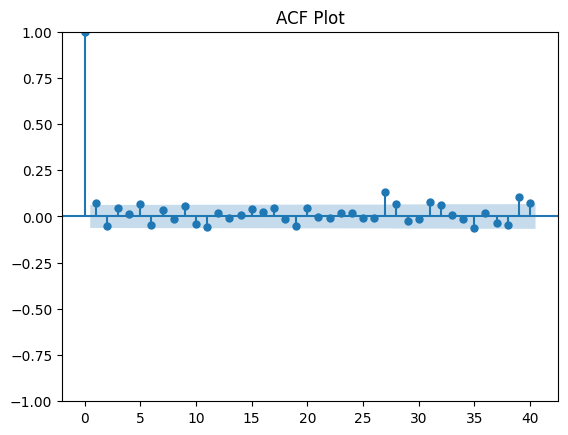

<Figure size 640x480 with 0 Axes>

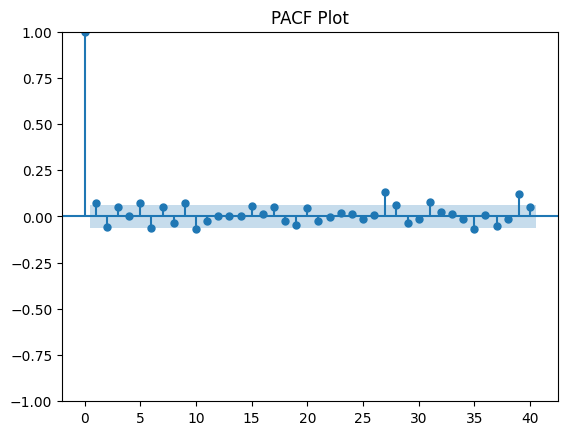

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Selecting a single stock and using 'Close' price for simplicity
stock_df = df[df['Symbol'] == 'TELCO']['Close']

# Making sure the time series is stationary
result = adfuller(stock_df.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If the time series is not stationary, differencing might be needed
if result[1] > 0.05:
    stock_df = stock_df.diff().dropna()

# Plot ACF and PACF
plt.figure()
plot_acf(stock_df, lags=40)
plt.title('ACF Plot')

plt.figure()
plot_pacf(stock_df, lags=40)
plt.title('PACF Plot')
plt.show()

Automated Grid Search
For a more systematic approach, you can perform a grid search over different combinations of p, d, q values.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_pdq = None
best_model = None

warnings.filterwarnings("ignore")  # Ignore warning messages

# Grid search
for param in pdq:
    try:
        model = ARIMA(stock_df, order=param)
        results = model.fit()

        # Compare current model's AIC with the best one
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

print(f'Best ARIMA{best_pdq} AIC: {best_aic}')

Best ARIMA(1, 1, 2) AIC: 5851.452820078914


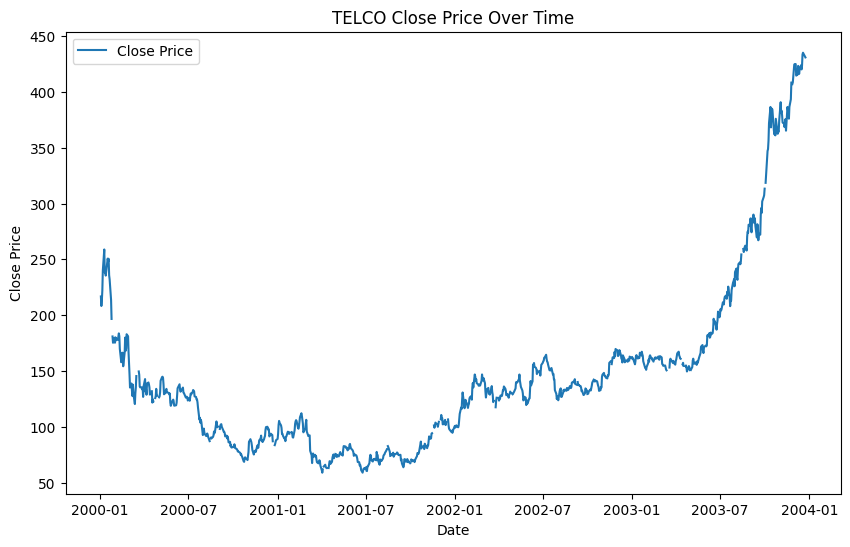

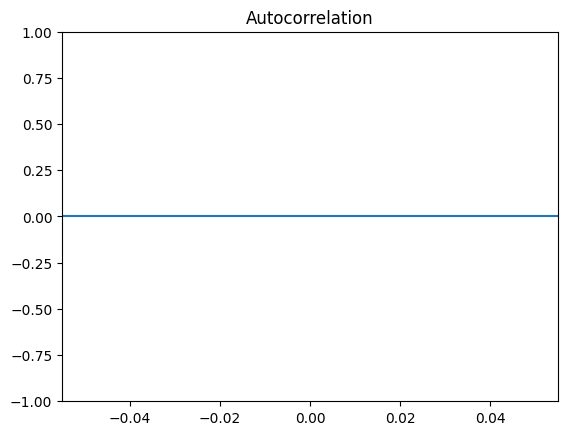

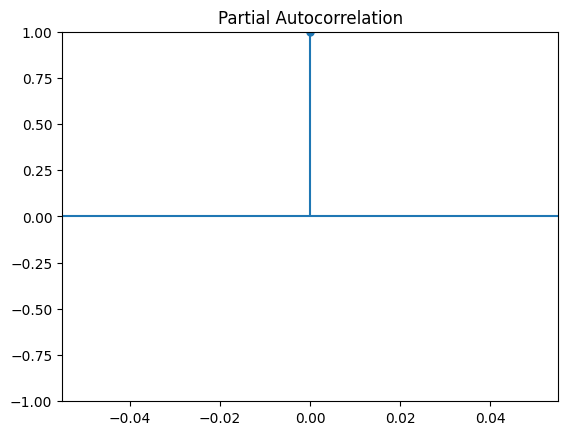

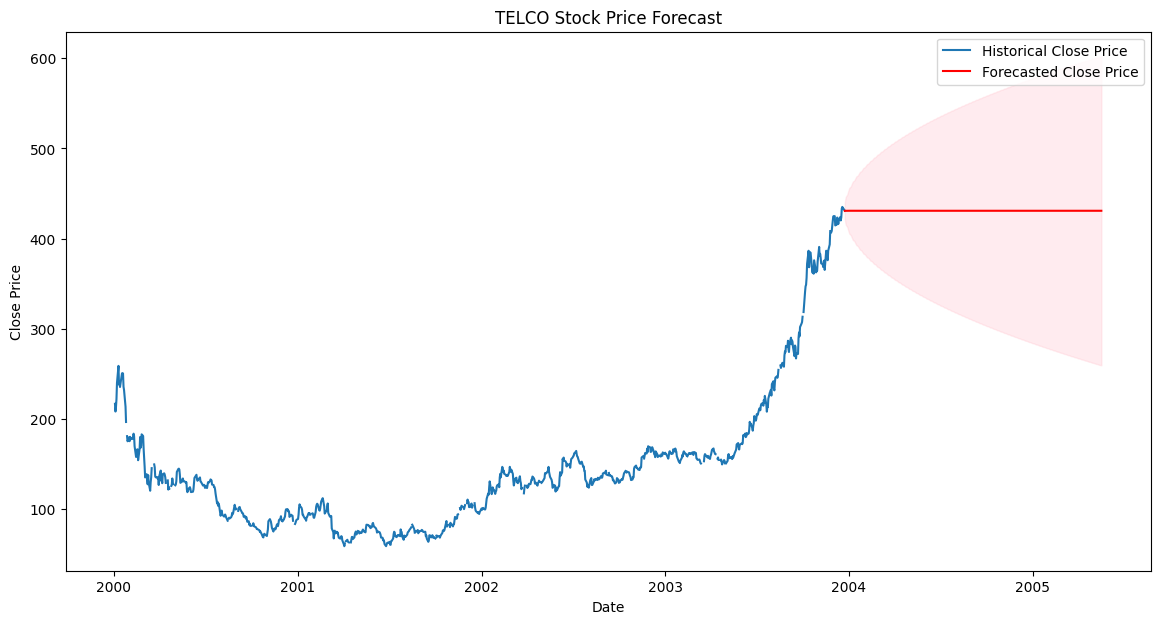

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Load the dataset
df = pd.read_csv('Automobile.csv', index_col='Date', parse_dates=True)

# Choose a stock to forecast, for example, 'TELCO'
telco_df = df[df['Symbol'] == 'TELCO']

# Use 'Close' price for forecasting
telco_close = telco_df['Close'].asfreq('B')  # 'B' denotes business day frequency


# Time series analysis and diagnostics
plt.figure(figsize=(10, 6))
plt.plot(telco_close.index, telco_close, label='Close Price')
plt.title('TELCO Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot ACF and PACF
plot_acf(telco_close)
plot_pacf(telco_close)
plt.show()

# Fit the ARIMA model
# The order (p,d,q) needs to be determined using diagnostics above or grid search
arima_model = ARIMA(telco_close, order=(1, 1, 2))
arima_result = arima_model.fit()

# Forecast future stock prices
forecast_days = 365
forecast = arima_result.get_forecast(steps=forecast_days)
forecast_index = pd.date_range(start=telco_close.index[-1], periods=forecast_days, freq='B')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the historical data along with the forecasted values
plt.figure(figsize=(14, 7))
plt.plot(telco_close.index, telco_close, label='Historical Close Price')
plt.plot(forecast_index, forecast_values, label='Forecasted Close Price', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('TELCO Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# prompt: import the data and replace the null values with 0

import pandas as pd

# Load data
data = pd.read_csv('Automobile.csv')

# Replace null values with 0
data.fillna(0, inplace=True)

# Print the data
print(data)


             Date      Symbol Series  Prev Close     Open     High     Low  \
0      2000-01-03       TELCO     EQ      201.60   207.40   217.25   207.4   
1      2000-01-04       TELCO     EQ      216.75   217.00   219.00   206.0   
2      2000-01-05       TELCO     EQ      208.20   194.00   217.80   194.0   
3      2000-01-06       TELCO     EQ      213.25   215.00   229.90   215.0   
4      2000-01-07       TELCO     EQ      222.10   224.00   239.90   223.1   
...           ...         ...    ...         ...      ...      ...     ...   
28843  2021-04-26  BAJAJ-AUTO     EQ     3672.50  3682.20  3749.00  3676.0   
28844  2021-04-27  BAJAJ-AUTO     EQ     3738.85  3738.85  3798.00  3727.2   
28845  2021-04-28  BAJAJ-AUTO     EQ     3785.50  3810.05  3954.00  3807.0   
28846  2021-04-29  BAJAJ-AUTO     EQ     3889.75  3943.00  3954.30  3807.1   
28847  2021-04-30  BAJAJ-AUTO     EQ     3836.45  3805.00  3966.35  3800.0   

          Last    Close     VWAP   Volume      Turnover   Trade

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np


# Filter for a specific stock, e.g., 'TELCO'
stock_df = df[df['Symbol'] == 'TELCO']

# Use 'Close' price for forecasting
close_prices = stock_df[['Close']].copy()

# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices['Close'] = scaler.fit_transform(close_prices[['Close']])

In [ ]:
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data.iloc[i:(i + sequence_length)].values
        y = data.iloc[i + sequence_length].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 60  # Number of days to look back for prediction
X, y = create_sequences(close_prices, sequence_length)

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
22/22 [==============================] - 7s 102ms/step - loss: 0.0030 - val_loss: 1.5603e-04
Epoch 2/20
22/22 [==============================] - 1s 46ms/step - loss: 5.2486e-04 - val_loss: 7.6745e-04
Epoch 3/20
22/22 [==============================] - 1s 48ms/step - loss: 5.4034e-04 - val_loss: 2.7835e-04
Epoch 4/20
22/22 [==============================] - 1s 48ms/step - loss: 4.5189e-04 - val_loss: 1.8763e-04
Epoch 5/20
22/22 [==============================] - 1s 48ms/step - loss: 4.0006e-04 - val_loss: 1.3590e-04
Epoch 6/20
22/22 [==============================] - 1s 47ms/step - loss: 3.9062e-04 - val_loss: 1.8256e-04
Epoch 7/20
22/22 [==============================] - 1s 47ms/step - loss: 3.4459e-04 - val_loss: 2.3189e-04
Epoch 8/20
22/22 [==============================] - 1s 48ms/step - loss: 3.3382e-04 - val_loss: 1.3149e-04
Epoch 9/20
22/22 [==============================] - 1s 65ms/step - loss: 3.2485e-04 - val_loss: 1.3589e-04
Epoch 10/20
22/22 [=====================

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual values
y_test_scaled = scaler.inverse_transform(y_test)

6/6 [==============================] - 1s 14ms/step


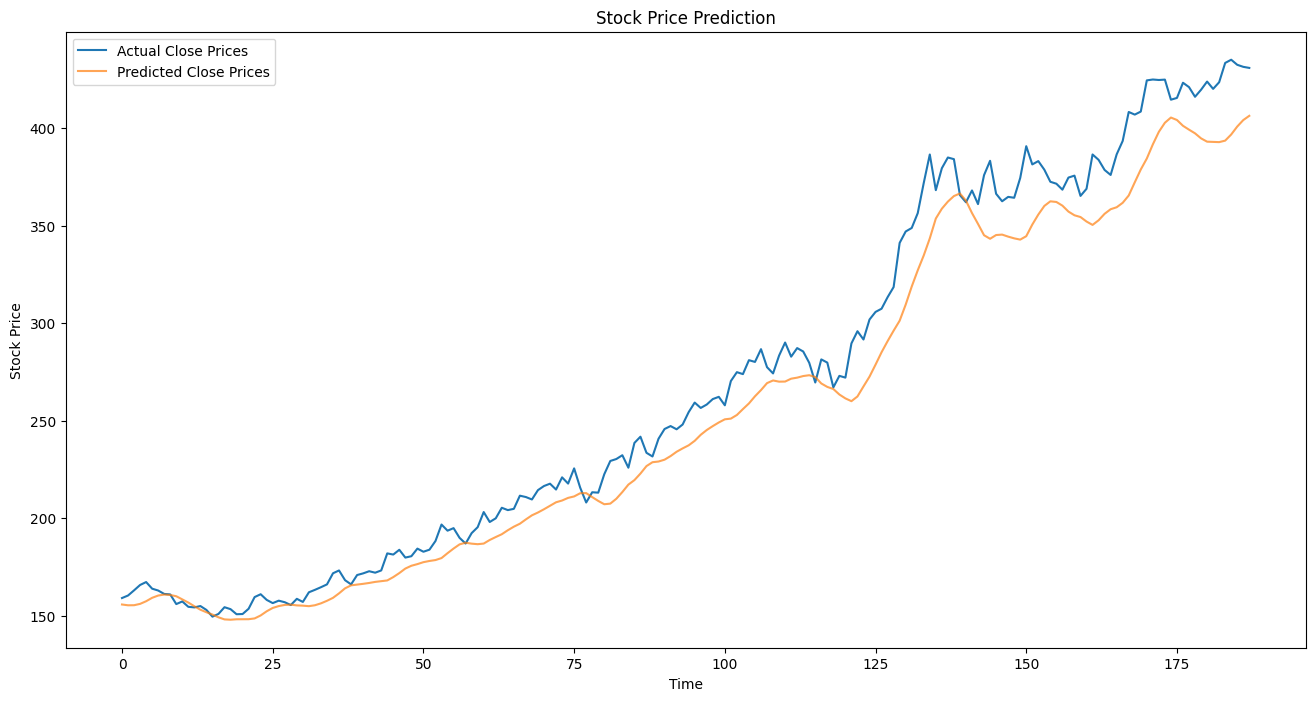

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(y_test_scaled, label='Actual Close Prices')
plt.plot(predictions, label='Predicted Close Prices', alpha=0.7)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

EXPLAINAITION FOR DATES

To modify the plot to show dates on the X-axis for your stock price prediction graph, you'll need to extract the corresponding dates from your dataset for the test set. Since the LSTM model uses sequences of data for predictions, the dates associated with the predictions will start after the last date in the training set plus the sequence length. Here's how you can adjust the plotting code to include dates on the X-axis:
First, ensure you have the dates extracted and aligned with your predictions and actual values. Assuming you have a sequence_length and you've split your data into training and testing sets, you can calculate the starting index for the test set predictions:

In [ ]:
# Assuming 'Date' is the index of your DataFrame after setting it with `parse_dates=True` during load
dates = df.index

# Calculate the start index for the test set dates based on the length of the training set and sequence length
test_start_idx = len(dates) - len(y_test_scaled) - sequence_length

# Extract the corresponding dates for the test set predictions
prediction_dates = dates[test_start_idx: test_start_idx + len(predictions)]

# Ensure the dates are aligned with your predictions array
assert len(prediction_dates) == len(predictions), "The dates and predictions lengths do not match."

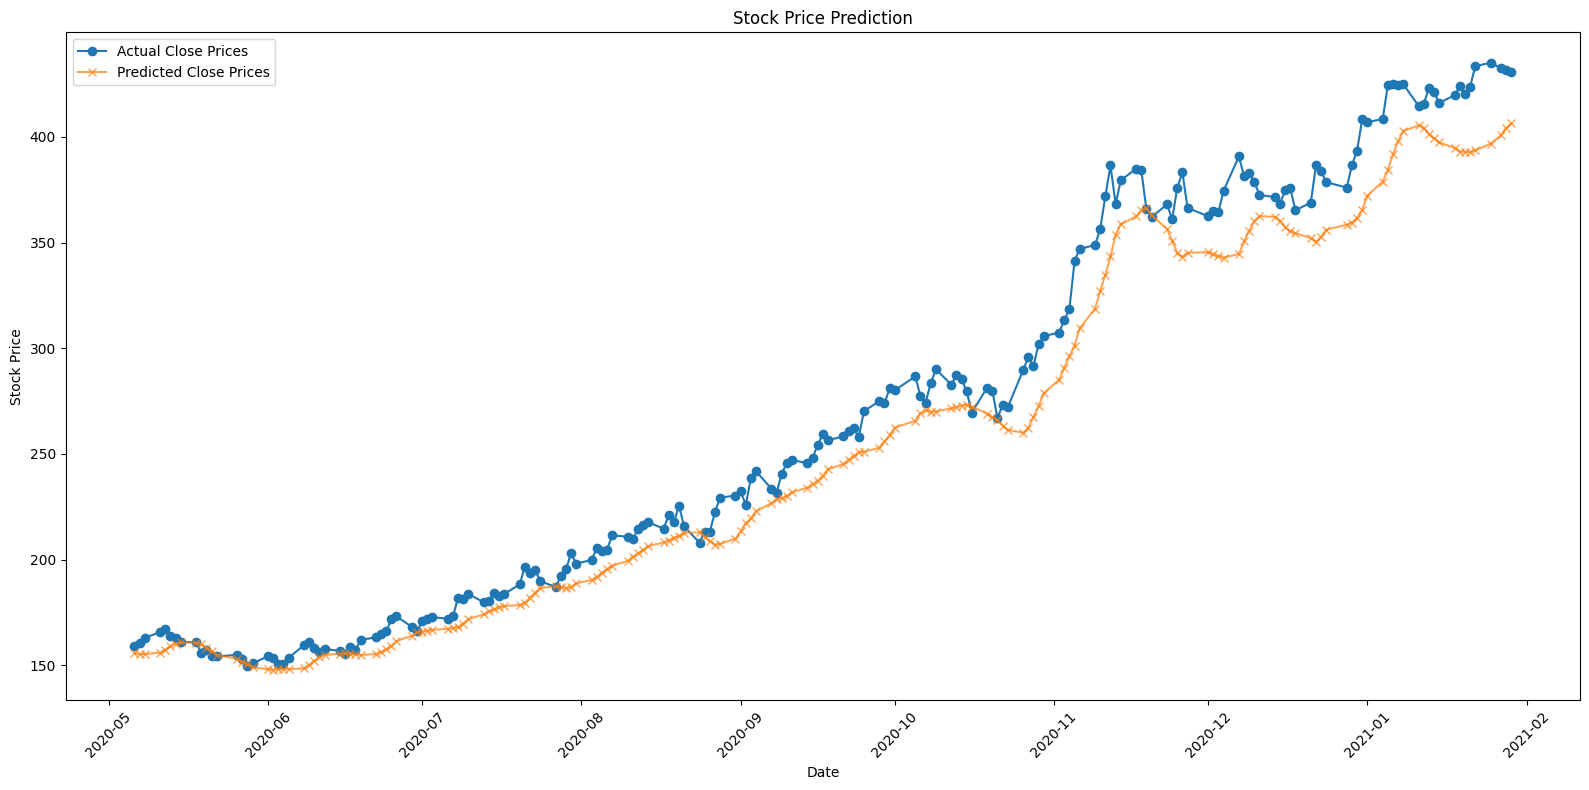

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(prediction_dates, y_test_scaled, label='Actual Close Prices', marker='o')
plt.plot(prediction_dates, predictions, label='Predicted Close Prices', alpha=0.7, marker='x')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [50]:
# prompt: import the data and replace the null values with 0

import pandas as pd

# Load data
df = pd.read_csv('Automobile.csv')

# Replace null values with 0
df.fillna(0, inplace=True)

# Print the data
print(df)


             Date      Symbol Series  Prev Close     Open     High     Low  \
0      2000-01-03       TELCO     EQ      201.60   207.40   217.25   207.4   
1      2000-01-04       TELCO     EQ      216.75   217.00   219.00   206.0   
2      2000-01-05       TELCO     EQ      208.20   194.00   217.80   194.0   
3      2000-01-06       TELCO     EQ      213.25   215.00   229.90   215.0   
4      2000-01-07       TELCO     EQ      222.10   224.00   239.90   223.1   
...           ...         ...    ...         ...      ...      ...     ...   
28843  2021-04-26  BAJAJ-AUTO     EQ     3672.50  3682.20  3749.00  3676.0   
28844  2021-04-27  BAJAJ-AUTO     EQ     3738.85  3738.85  3798.00  3727.2   
28845  2021-04-28  BAJAJ-AUTO     EQ     3785.50  3810.05  3954.00  3807.0   
28846  2021-04-29  BAJAJ-AUTO     EQ     3889.75  3943.00  3954.30  3807.1   
28847  2021-04-30  BAJAJ-AUTO     EQ     3836.45  3805.00  3966.35  3800.0   

          Last    Close     VWAP   Volume      Turnover   Trade

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [58]:
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data.iloc[i:(i + sequence_length)].values
        y = data.iloc[i + sequence_length].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

def train_model_for_stock(stock_df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_df['Close'].values.reshape(-1,1))

    sequence_length = 60
    X, y = create_sequences(pd.DataFrame(scaled_data), sequence_length)

    # Split data into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=20)

    # Predicting and inverse transforming the predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test)

    return predictions, y_test, scaler.inverse_transform(y_test)

def plot_predictions(stock_name, true_values, predictions):
    plt.figure(figsize=(14,7))
    plt.plot(true_values, label='Actual Close Price')
    plt.plot(predictions, label='Predicted Close Price', alpha=0.7)
    plt.title(f'{stock_name} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

Processing TELCO...
Epoch 1/20
24/24 [==============================] - 7s 55ms/step - loss: 0.0052
Epoch 2/20
24/24 [==============================] - 1s 55ms/step - loss: 6.8190e-04
Epoch 3/20
24/24 [==============================] - 1s 54ms/step - loss: 4.3097e-04
Epoch 4/20
24/24 [==============================] - 1s 55ms/step - loss: 4.0261e-04
Epoch 5/20
24/24 [==============================] - 1s 54ms/step - loss: 4.1656e-04
Epoch 6/20
24/24 [==============================] - 1s 54ms/step - loss: 3.8294e-04
Epoch 7/20
24/24 [==============================] - 1s 55ms/step - loss: 4.0590e-04
Epoch 8/20
24/24 [==============================] - 2s 73ms/step - loss: 3.6100e-04
Epoch 9/20
24/24 [==============================] - 2s 82ms/step - loss: 3.4682e-04
Epoch 10/20
24/24 [==============================] - 1s 55ms/step - loss: 3.2232e-04
Epoch 11/20
24/24 [==============================] - 1s 55ms/step - loss: 3.3710e-04
Epoch 12/20
24/24 [==============================] - 1s 57

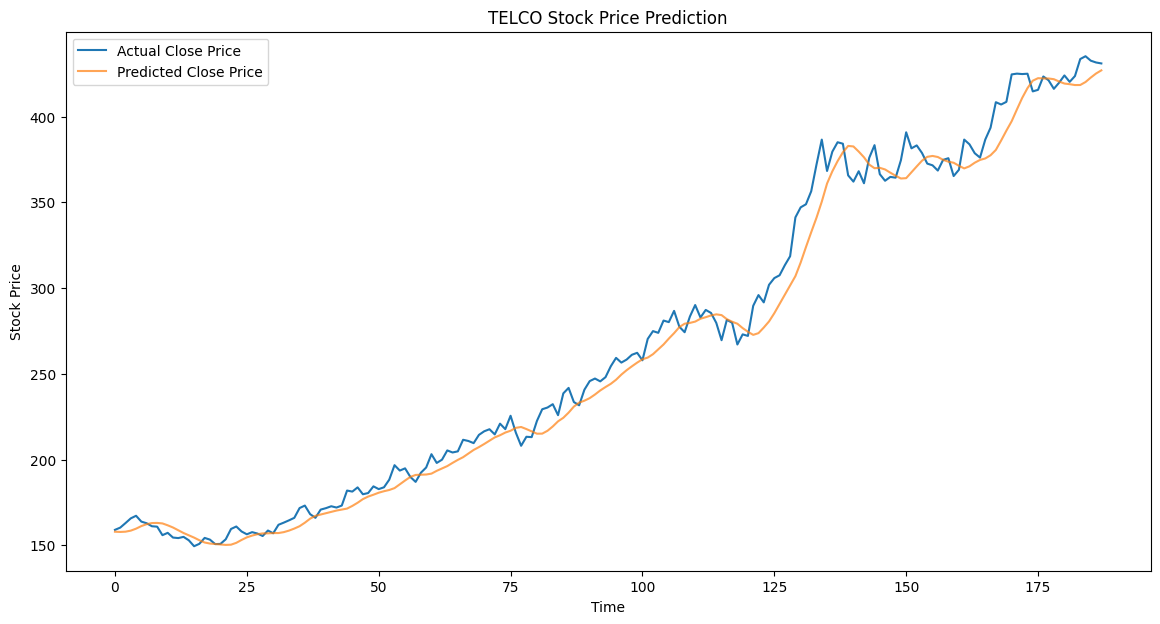

Processing TATAMOTORS...
Epoch 1/20
107/107 [==============================] - 12s 60ms/step - loss: 0.0077
Epoch 2/20
107/107 [==============================] - 7s 62ms/step - loss: 9.9875e-04
Epoch 3/20
107/107 [==============================] - 7s 68ms/step - loss: 8.6166e-04
Epoch 4/20
107/107 [==============================] - 9s 79ms/step - loss: 7.6049e-04
Epoch 5/20
107/107 [==============================] - 6s 54ms/step - loss: 6.7828e-04
Epoch 6/20
107/107 [==============================] - 9s 87ms/step - loss: 6.4764e-04
Epoch 7/20
107/107 [==============================] - 6s 54ms/step - loss: 6.0949e-04
Epoch 8/20
107/107 [==============================] - 7s 64ms/step - loss: 5.0788e-04
Epoch 9/20
107/107 [==============================] - 6s 54ms/step - loss: 4.7632e-04
Epoch 10/20
107/107 [==============================] - 7s 65ms/step - loss: 4.4214e-04
Epoch 11/20
107/107 [==============================] - 6s 54ms/step - loss: 4.3864e-04
Epoch 12/20
107/107 [=========

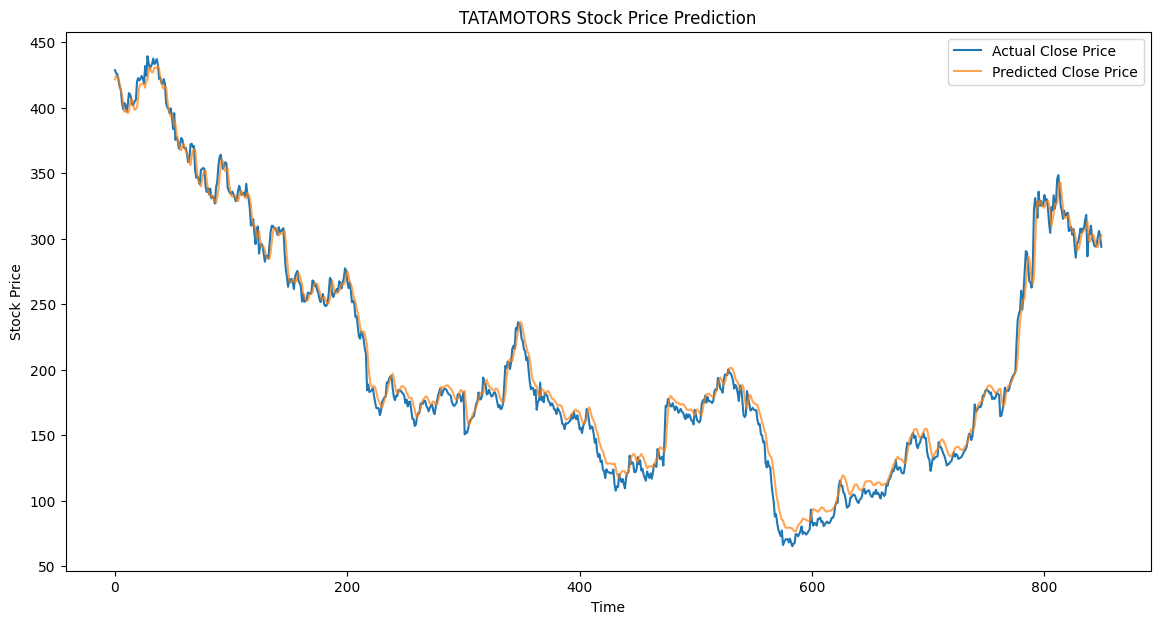

Processing EICHERMOT...
Epoch 1/20
131/131 [==============================] - 11s 53ms/step - loss: 0.0016
Epoch 2/20
131/131 [==============================] - 6s 45ms/step - loss: 1.2246e-04
Epoch 3/20
131/131 [==============================] - 7s 55ms/step - loss: 1.1906e-04
Epoch 4/20
131/131 [==============================] - 6s 48ms/step - loss: 1.0970e-04
Epoch 5/20
131/131 [==============================] - 7s 54ms/step - loss: 1.3292e-04
Epoch 6/20
131/131 [==============================] - 6s 46ms/step - loss: 1.0806e-04
Epoch 7/20
131/131 [==============================] - 7s 55ms/step - loss: 1.1013e-04
Epoch 8/20
131/131 [==============================] - 6s 46ms/step - loss: 1.0529e-04
Epoch 9/20
131/131 [==============================] - 7s 55ms/step - loss: 1.1970e-04
Epoch 10/20
131/131 [==============================] - 6s 46ms/step - loss: 9.9533e-05
Epoch 11/20
131/131 [==============================] - 7s 55ms/step - loss: 8.8764e-05
Epoch 12/20
131/131 [==========

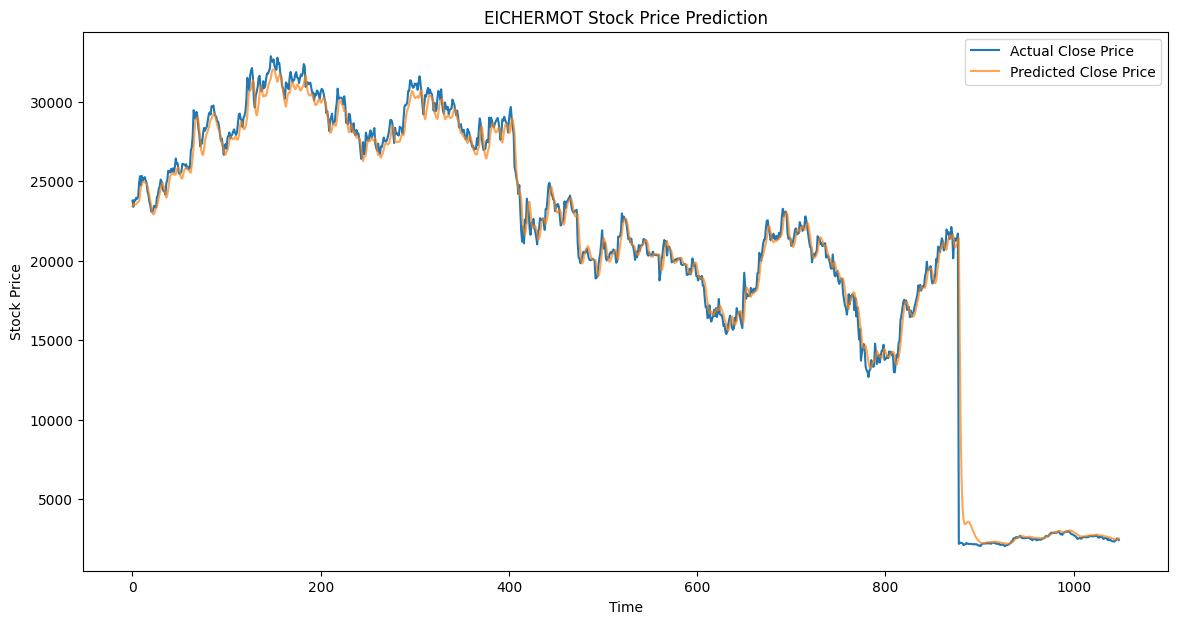

Processing HEROHONDA...
Epoch 1/20
71/71 [==============================] - 10s 59ms/step - loss: 0.0042
Epoch 2/20
71/71 [==============================] - 5s 74ms/step - loss: 4.9233e-04
Epoch 3/20
71/71 [==============================] - 4s 58ms/step - loss: 4.7083e-04
Epoch 4/20
71/71 [==============================] - 4s 58ms/step - loss: 4.3953e-04
Epoch 5/20
71/71 [==============================] - 5s 74ms/step - loss: 3.9737e-04
Epoch 6/20
71/71 [==============================] - 4s 60ms/step - loss: 3.8606e-04
Epoch 7/20
71/71 [==============================] - 5s 64ms/step - loss: 3.7106e-04
Epoch 8/20
71/71 [==============================] - 5s 70ms/step - loss: 3.4006e-04
Epoch 9/20
71/71 [==============================] - 4s 58ms/step - loss: 3.4165e-04
Epoch 10/20
71/71 [==============================] - 5s 67ms/step - loss: 3.1210e-04
Epoch 11/20
71/71 [==============================] - 5s 65ms/step - loss: 2.9430e-04
Epoch 12/20
71/71 [==============================] - 

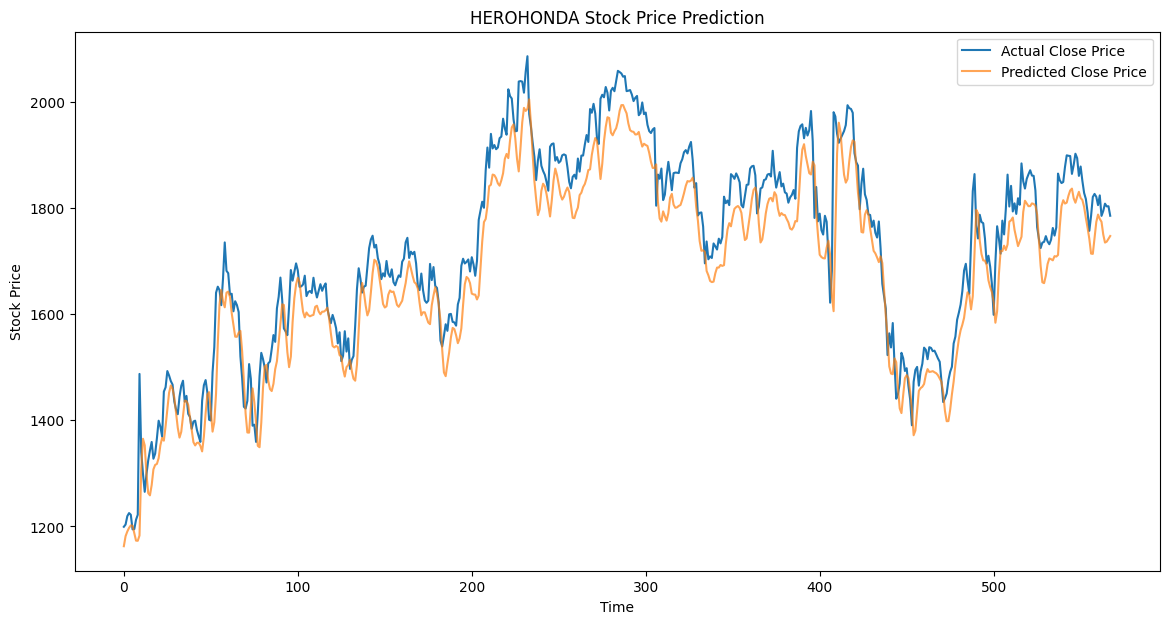

Processing HEROMOTOCO...
Epoch 1/20
59/59 [==============================] - 7s 59ms/step - loss: 0.0214
Epoch 2/20
59/59 [==============================] - 4s 70ms/step - loss: 0.0014
Epoch 3/20
59/59 [==============================] - 4s 66ms/step - loss: 0.0013
Epoch 4/20
59/59 [==============================] - 3s 59ms/step - loss: 0.0012
Epoch 5/20
59/59 [==============================] - 4s 60ms/step - loss: 0.0012
Epoch 6/20
59/59 [==============================] - 5s 79ms/step - loss: 0.0011
Epoch 7/20
59/59 [==============================] - 4s 59ms/step - loss: 0.0011
Epoch 8/20
59/59 [==============================] - 3s 58ms/step - loss: 0.0010
Epoch 9/20
59/59 [==============================] - 4s 75ms/step - loss: 9.0686e-04
Epoch 10/20
59/59 [==============================] - 4s 62ms/step - loss: 8.8210e-04
Epoch 11/20
59/59 [==============================] - 3s 59ms/step - loss: 8.0789e-04
Epoch 12/20
59/59 [==============================] - 4s 62ms/step - loss: 7.1722e

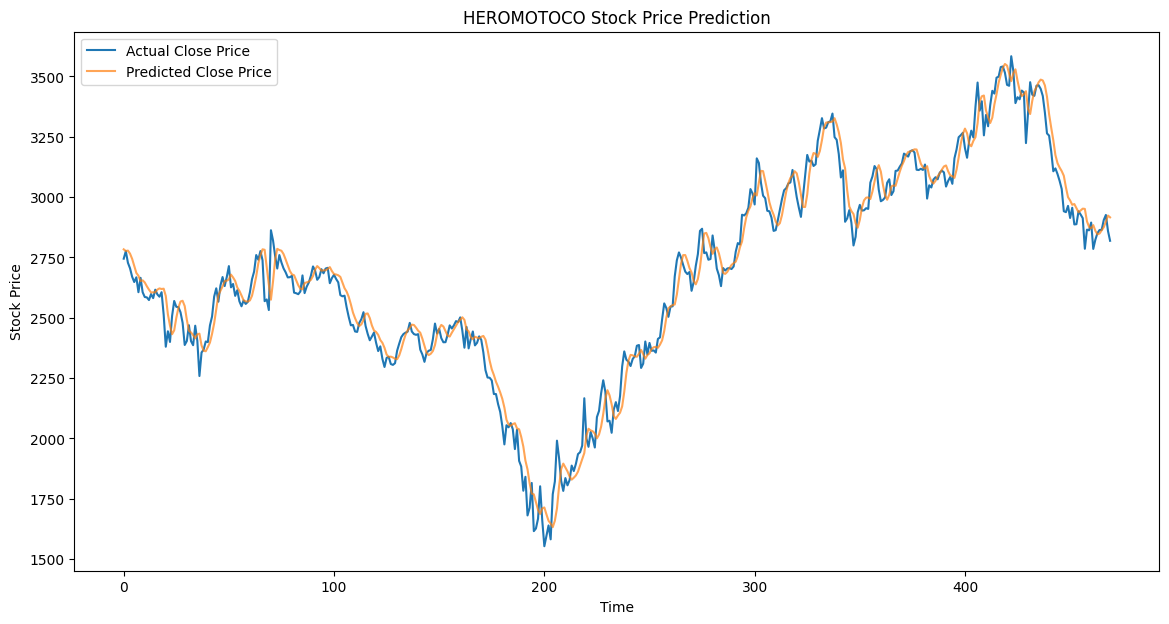

Processing MARUTI...
Epoch 1/20
110/110 [==============================] - 12s 69ms/step - loss: 0.0011
Epoch 2/20
110/110 [==============================] - 6s 58ms/step - loss: 1.1662e-04
Epoch 3/20
110/110 [==============================] - 8s 70ms/step - loss: 1.1256e-04
Epoch 4/20
110/110 [==============================] - 7s 64ms/step - loss: 1.3295e-04
Epoch 5/20
110/110 [==============================] - 7s 63ms/step - loss: 1.0672e-04
Epoch 6/20
110/110 [==============================] - 8s 70ms/step - loss: 1.0066e-04
Epoch 7/20
110/110 [==============================] - 7s 60ms/step - loss: 1.1225e-04
Epoch 8/20
110/110 [==============================] - 8s 70ms/step - loss: 1.0370e-04
Epoch 9/20
110/110 [==============================] - 7s 59ms/step - loss: 8.0683e-05
Epoch 10/20
110/110 [==============================] - 8s 70ms/step - loss: 7.6110e-05
Epoch 11/20
110/110 [==============================] - 6s 59ms/step - loss: 9.8761e-05
Epoch 12/20
110/110 [=============

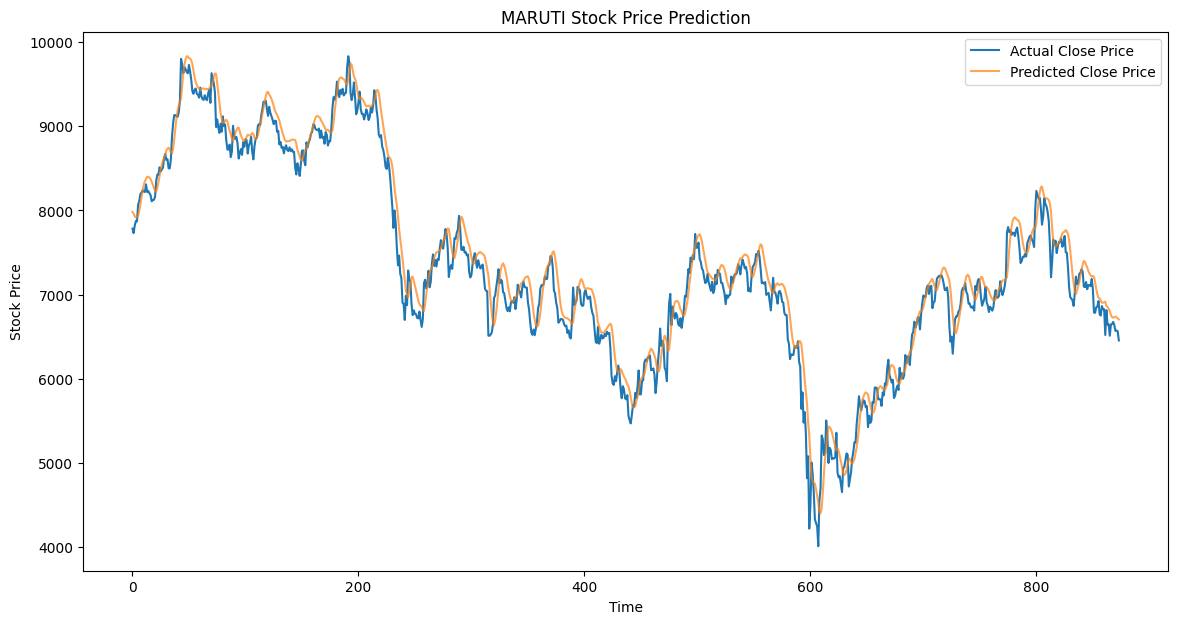

Processing M&M...
Epoch 1/20
132/132 [==============================] - 13s 66ms/step - loss: 0.0074
Epoch 2/20
132/132 [==============================] - 8s 62ms/step - loss: 7.3181e-04
Epoch 3/20
132/132 [==============================] - 9s 69ms/step - loss: 6.7757e-04
Epoch 4/20
132/132 [==============================] - 8s 62ms/step - loss: 6.3986e-04
Epoch 5/20
132/132 [==============================] - 8s 64ms/step - loss: 5.5170e-04
Epoch 6/20
132/132 [==============================] - 9s 68ms/step - loss: 4.9847e-04
Epoch 7/20
132/132 [==============================] - 8s 58ms/step - loss: 4.3722e-04
Epoch 8/20
132/132 [==============================] - 9s 66ms/step - loss: 4.1287e-04
Epoch 9/20
132/132 [==============================] - 9s 67ms/step - loss: 4.1071e-04
Epoch 10/20
132/132 [==============================] - 8s 58ms/step - loss: 4.2702e-04
Epoch 11/20
132/132 [==============================] - 9s 67ms/step - loss: 3.2774e-04
Epoch 12/20
132/132 [================

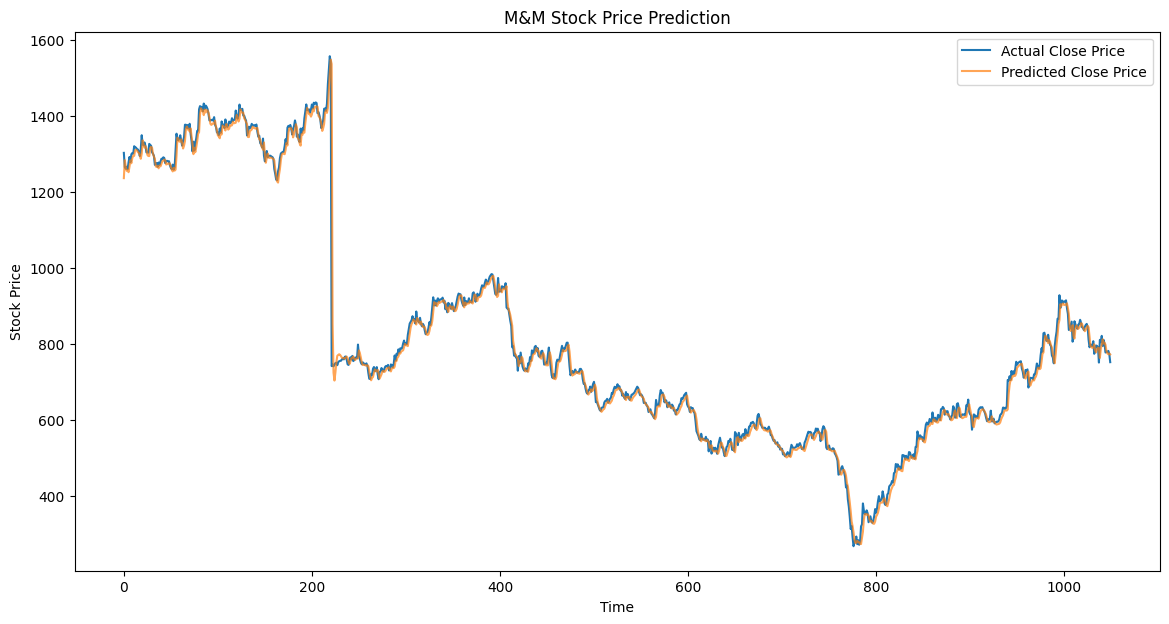

Processing BAJAJ-AUTO...
Epoch 1/20
79/79 [==============================] - 10s 74ms/step - loss: 0.0108
Epoch 2/20
79/79 [==============================] - 5s 61ms/step - loss: 6.8196e-04
Epoch 3/20
79/79 [==============================] - 5s 65ms/step - loss: 6.6304e-04
Epoch 4/20
79/79 [==============================] - 5s 67ms/step - loss: 6.0474e-04
Epoch 5/20
79/79 [==============================] - 5s 58ms/step - loss: 5.6143e-04
Epoch 6/20
79/79 [==============================] - 6s 74ms/step - loss: 5.4291e-04
Epoch 7/20
79/79 [==============================] - 5s 59ms/step - loss: 4.7543e-04
Epoch 8/20
79/79 [==============================] - 5s 60ms/step - loss: 4.5016e-04
Epoch 9/20
79/79 [==============================] - 6s 74ms/step - loss: 4.3037e-04
Epoch 10/20
79/79 [==============================] - 5s 58ms/step - loss: 4.9518e-04
Epoch 11/20
79/79 [==============================] - 6s 74ms/step - loss: 3.9068e-04
Epoch 12/20
79/79 [==============================] -

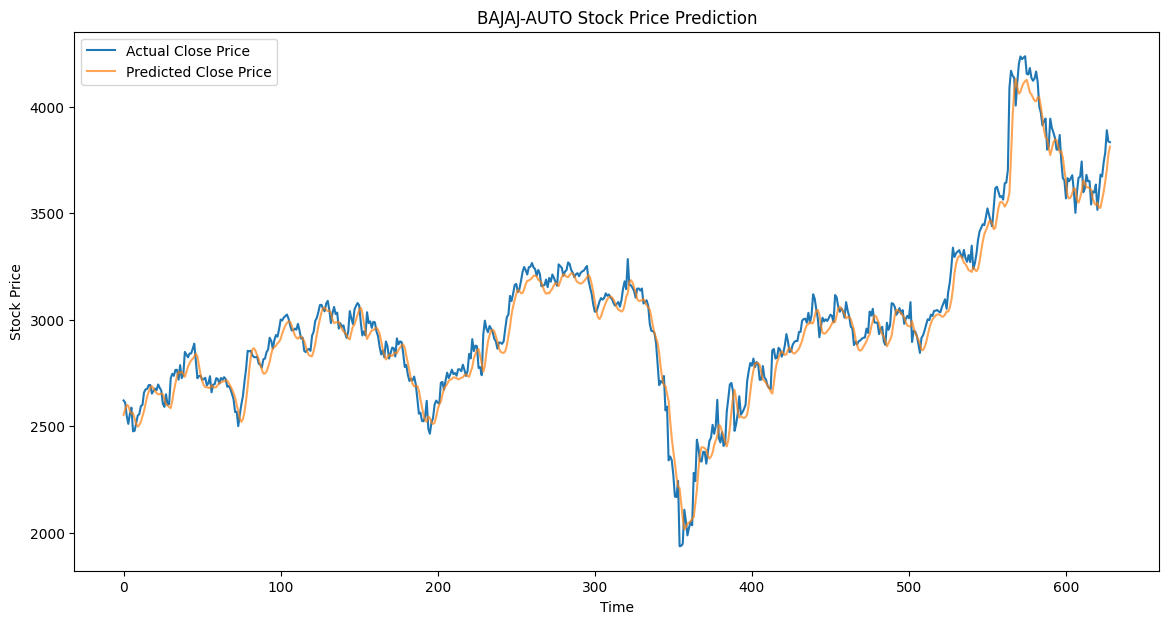

In [53]:
unique_stocks = df['Symbol'].unique()

for stock in unique_stocks:
    stock_df = df[df['Symbol'] == stock]
    if len(stock_df) > 2 * 60:  # Ensure there's enough data
        print(f"Processing {stock}...")
        predictions, y_test, true_values = train_model_for_stock(stock_df)
        plot_predictions(stock, true_values, predictions)

In [61]:
def plot_predictions(stock_name, true_values, predictions, start_date):

    # Calculate the start index for the test set dates based on the length of the training set and sequence length
    test_start_idx = len(dates) - len(true_values) - sequence_length

    # Extract the corresponding dates for the test set predictions
    prediction_dates = dates[test_start_idx: test_start_idx + len(predictions)]

    # Ensure the dates are aligned with your predictions array
    assert len(prediction_dates) == len(predictions), "The dates and predictions lengths do not match."

    plt.figure(figsize=(14,7))
    plt.plot(prediction_dates, true_values, label='Actual Close Price', marker='o')
    plt.plot(prediction_dates, predictions, label='Predicted Close Price', alpha=0.7, marker='x')
    plt.title(f'{stock_name} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)  # Rotate dates for better readability
    plt.legend()
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    plt.show()

Processing TELCO...
Epoch 1/20
24/24 [==============================] - 7s 56ms/step - loss: 0.0041
Epoch 2/20
24/24 [==============================] - 1s 55ms/step - loss: 5.5852e-04
Epoch 3/20
24/24 [==============================] - 1s 55ms/step - loss: 4.6178e-04
Epoch 4/20
24/24 [==============================] - 1s 56ms/step - loss: 4.4321e-04
Epoch 5/20
24/24 [==============================] - 1s 56ms/step - loss: 4.0118e-04
Epoch 6/20
24/24 [==============================] - 1s 55ms/step - loss: 3.7870e-04
Epoch 7/20
24/24 [==============================] - 2s 73ms/step - loss: 3.9368e-04
Epoch 8/20
24/24 [==============================] - 2s 82ms/step - loss: 3.7127e-04
Epoch 9/20
24/24 [==============================] - 1s 56ms/step - loss: 3.4524e-04
Epoch 10/20
24/24 [==============================] - 1s 56ms/step - loss: 3.2403e-04
Epoch 11/20
24/24 [==============================] - 1s 55ms/step - loss: 3.0220e-04
Epoch 12/20
24/24 [==============================] - 1s 56

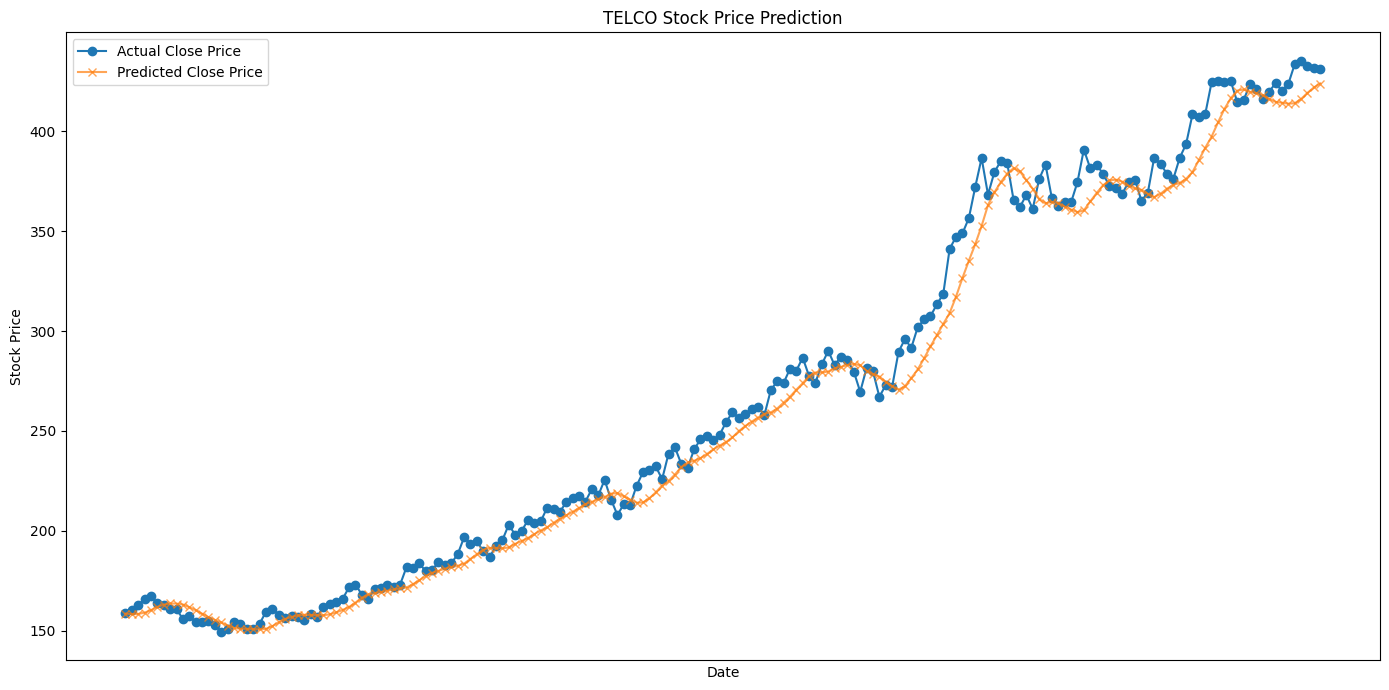

Processing TATAMOTORS...
Epoch 1/20
107/107 [==============================] - 21s 103ms/step - loss: 0.0074
Epoch 2/20
107/107 [==============================] - 6s 56ms/step - loss: 9.5742e-04
Epoch 3/20
107/107 [==============================] - 8s 73ms/step - loss: 8.2592e-04
Epoch 4/20
107/107 [==============================] - 12s 110ms/step - loss: 7.3999e-04
Epoch 5/20
107/107 [==============================] - 9s 79ms/step - loss: 6.6192e-04
Epoch 6/20
107/107 [==============================] - 7s 65ms/step - loss: 6.8784e-04
Epoch 7/20
107/107 [==============================] - 9s 88ms/step - loss: 6.7241e-04
Epoch 8/20
107/107 [==============================] - 12s 116ms/step - loss: 5.6722e-04
Epoch 9/20
107/107 [==============================] - 7s 62ms/step - loss: 5.3333e-04
Epoch 10/20
107/107 [==============================] - 8s 71ms/step - loss: 4.8326e-04
Epoch 11/20
107/107 [==============================] - 12s 109ms/step - loss: 4.6531e-04
Epoch 12/20
107/107 [==

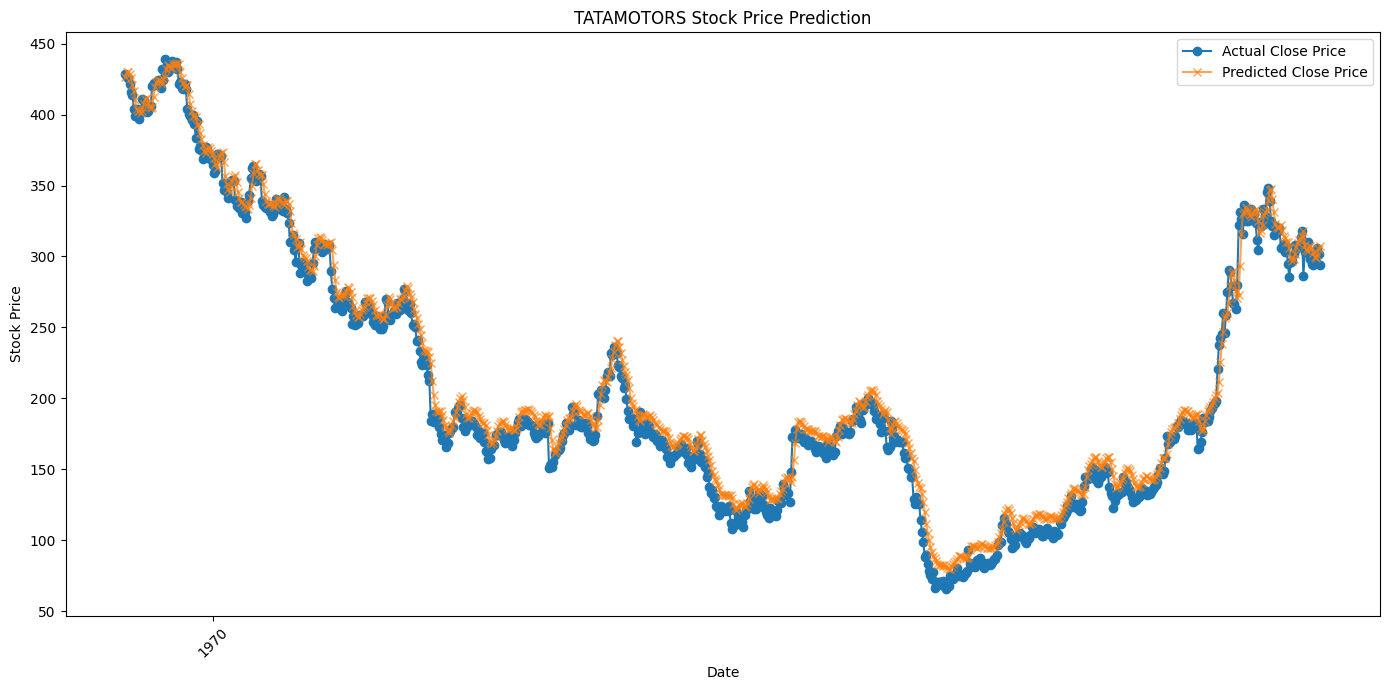

Processing EICHERMOT...
Epoch 1/20
131/131 [==============================] - 10s 45ms/step - loss: 0.0014
Epoch 2/20
131/131 [==============================] - 10s 79ms/step - loss: 1.5622e-04
Epoch 3/20
131/131 [==============================] - 13s 96ms/step - loss: 1.3441e-04
Epoch 4/20
131/131 [==============================] - 6s 46ms/step - loss: 1.3465e-04
Epoch 5/20
131/131 [==============================] - 7s 54ms/step - loss: 1.2940e-04
Epoch 6/20
131/131 [==============================] - 13s 95ms/step - loss: 1.3324e-04
Epoch 7/20
131/131 [==============================] - 10s 74ms/step - loss: 9.9319e-05
Epoch 8/20
131/131 [==============================] - 6s 47ms/step - loss: 1.0592e-04
Epoch 9/20
131/131 [==============================] - 8s 59ms/step - loss: 7.8921e-05
Epoch 10/20
131/131 [==============================] - 12s 92ms/step - loss: 8.3183e-05
Epoch 11/20
131/131 [==============================] - 9s 70ms/step - loss: 1.0075e-04
Epoch 12/20
131/131 [=====

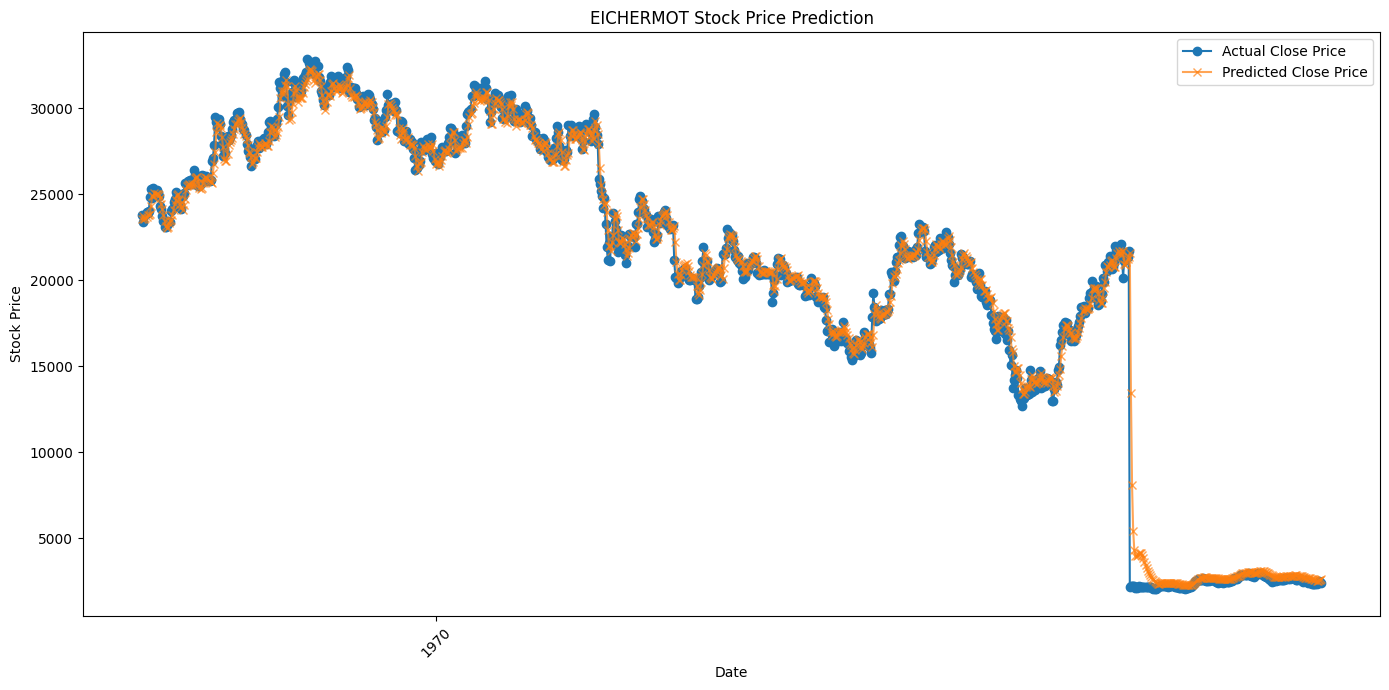

Processing HEROHONDA...
Epoch 1/20
71/71 [==============================] - 15s 109ms/step - loss: 0.0041
Epoch 2/20
71/71 [==============================] - 8s 115ms/step - loss: 5.0376e-04
Epoch 3/20
71/71 [==============================] - 4s 56ms/step - loss: 4.7488e-04
Epoch 4/20
71/71 [==============================] - 5s 71ms/step - loss: 4.5511e-04
Epoch 5/20
71/71 [==============================] - 5s 78ms/step - loss: 3.9678e-04
Epoch 6/20
71/71 [==============================] - 8s 118ms/step - loss: 3.8374e-04
Epoch 7/20
71/71 [==============================] - 8s 109ms/step - loss: 3.5554e-04
Epoch 8/20
71/71 [==============================] - 6s 76ms/step - loss: 3.1922e-04
Epoch 9/20
71/71 [==============================] - 4s 56ms/step - loss: 3.2654e-04
Epoch 10/20
71/71 [==============================] - 4s 60ms/step - loss: 3.1289e-04
Epoch 11/20
71/71 [==============================] - 8s 116ms/step - loss: 3.0326e-04
Epoch 12/20
71/71 [=============================

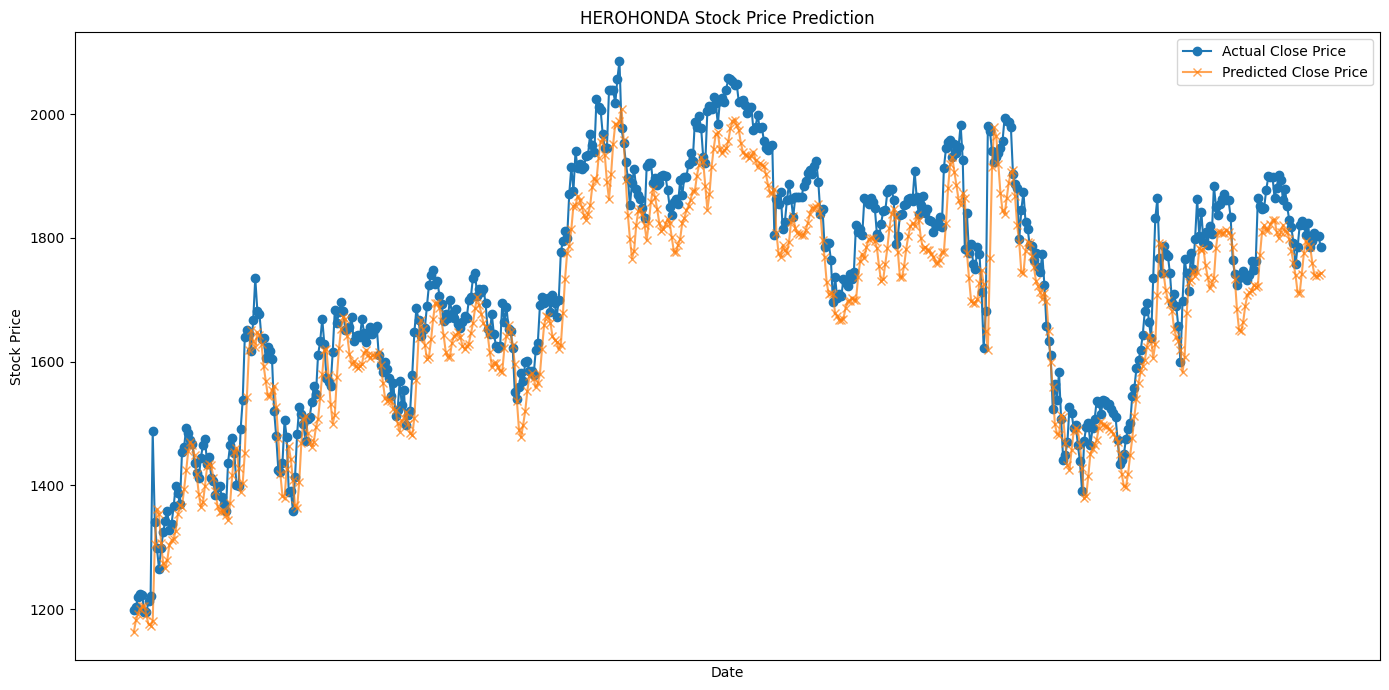

Processing HEROMOTOCO...
Epoch 1/20
59/59 [==============================] - 16s 116ms/step - loss: 0.0089
Epoch 2/20
59/59 [==============================] - 5s 81ms/step - loss: 0.0012
Epoch 3/20
59/59 [==============================] - 3s 56ms/step - loss: 0.0012
Epoch 4/20
59/59 [==============================] - 3s 57ms/step - loss: 0.0012
Epoch 5/20
59/59 [==============================] - 5s 78ms/step - loss: 0.0011
Epoch 6/20
59/59 [==============================] - 6s 100ms/step - loss: 0.0011
Epoch 7/20
59/59 [==============================] - 7s 114ms/step - loss: 0.0010
Epoch 8/20
59/59 [==============================] - 6s 103ms/step - loss: 9.5066e-04
Epoch 9/20
59/59 [==============================] - 5s 79ms/step - loss: 9.0699e-04
Epoch 10/20
59/59 [==============================] - 4s 70ms/step - loss: 8.6489e-04
Epoch 11/20
59/59 [==============================] - 3s 56ms/step - loss: 8.5724e-04
Epoch 12/20
59/59 [==============================] - 6s 100ms/step - los

KeyboardInterrupt: 

In [63]:
# Assuming 'df' is your DataFrame after loading 'Automobile.csv'
# and it has 'Date' as the index after setting it with `parse_dates=True` during load
sequence_length = 60
# Extract dates for the entire dataset
dates = df.index.unique()
dates = pd.to_datetime(dates).sort_values()  # Ensure dates are sorted

# Now you can call `plot_predictions` for each stock
unique_stocks = df['Symbol'].unique()

for stock in unique_stocks:
    stock_df = df[df['Symbol'] == stock]
    if len(stock_df) > 2 * sequence_length:  # Ensure there's enough data
        print(f"Processing {stock}...")
        predictions, y_test, true_values = train_model_for_stock(stock_df)
        start_date = stock_df.index[-len(y_test):][0]  # First date in the test set
        plot_predictions(stock, true_values, predictions, start_date)

In [ ]:
# Assuming 'Date' is the index of your DataFrame after setting it with `parse_dates=True` during load
dates = df.index

# Calculate the start index for the test set dates based on the length of the training set and sequence length
test_start_idx = len(dates) - len(y_test_scaled) - sequence_length

# Extract the corresponding dates for the test set predictions
prediction_dates = dates[test_start_idx: test_start_idx + len(predictions)]

# Ensure the dates are aligned with your predictions array
assert len(prediction_dates) == len(predictions), "The dates and predictions lengths do not match."

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(prediction_dates, y_test_scaled, label='Actual Close Prices', marker='o')
plt.plot(prediction_dates, predictions, label='Predicted Close Prices', alpha=0.7, marker='x')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
df = pd.read_csv('Automobile.csv', index_col='Date', parse_dates=True)


In [18]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.40,217.25,207.4,217.00,216.75,214.28,676126,1.448775e+13,0.0,0.0,0.0000
1,2000-01-04,TELCO,EQ,216.75,217.00,219.00,206.0,211.90,208.20,209.50,679215,1.422962e+13,0.0,0.0,0.0000
2,2000-01-05,TELCO,EQ,208.20,194.00,217.80,194.0,213.10,213.25,210.33,1120951,2.357684e+13,0.0,0.0,0.0000
3,2000-01-06,TELCO,EQ,213.25,215.00,229.90,215.0,222.00,222.10,225.29,1968998,4.435932e+13,0.0,0.0,0.0000
4,2000-01-07,TELCO,EQ,222.10,224.00,239.90,223.1,239.90,239.90,236.32,2199431,5.197636e+13,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28843,2021-04-26,BAJAJ-AUTO,EQ,3672.50,3682.20,3749.00,3676.0,3739.00,3738.85,3719.79,480016,1.785560e+14,36835.0,155563.0,0.3241
28844,2021-04-27,BAJAJ-AUTO,EQ,3738.85,3738.85,3798.00,3727.2,3795.00,3785.50,3764.89,518487,1.952048e+14,47765.0,140987.0,0.2719
28845,2021-04-28,BAJAJ-AUTO,EQ,3785.50,3810.05,3954.00,3807.0,3887.15,3889.75,3909.99,1252958,4.899048e+14,78857.0,190766.0,0.1523
28846,2021-04-29,BAJAJ-AUTO,EQ,3889.75,3943.00,3954.30,3807.1,3818.95,3836.45,3880.32,1335444,5.181950e+14,92106.0,168500.0,0.1262


In [19]:
df.iloc[60].values

array(['2000-03-30', 'TELCO', 'EQ', 134.9, 133.55, 133.65, 124.15, 126.4,
       126.75, 126.58, 894430, 11321774730000.0, 0.0, 0.0, 0.0],
      dtype=object)

In [45]:
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data.iloc[i:(i + sequence_length)].values
        y = data.iloc[i + sequence_length].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

def train_lstm_model(X_train, y_train, sequence_length):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, batch_size=32, epochs=1, verbose=1)
    return model

def forecast_and_plot(stock_df, stock_symbol, sequence_length=365):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_df['VWAP'].values.reshape(-1,1))

    X, y = create_sequences(pd.DataFrame(scaled_data), sequence_length)

    # Split data into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, y_train = X[:train_size], y[:train_size]
    # Train the LSTM model
    model = train_lstm_model(X_train, y_train, sequence_length)

    # Forecast the next 365 days
    forecasted = model.predict(np.array([X[-1]]))
    forecasted = scaler.inverse_transform(forecasted).flatten()
    # Generate future dates for plotting
    last_date = stock_df.Date.iloc[-1]
    future_dates = pd.date_range(start=last_date, periods=len(forecasted) + 1, freq='B')[1:]
    # Ensure the dates are aligned with your predictions array
    if len(future_dates) != len(forecasted):
        min_length = min(len(future_dates), len(forecasted))
        print(min_length)
        future_dates = future_dates[:min_length]
        forecasted = forecasted[:min_length]
    print("future_dates:",future_dates,forecasted)

    # # Plot the results
    # plt.figure(figsize=(14,7))
    # plt.plot(stock_df.index, stock_df['VWAP'], label='Historical VWAP')
    # plt.plot(future_dates, forecasted, label='Forecasted VWAP', color='red')
    # plt.title(f'{stock_symbol} VWAP Forecast for the Next 365 Days')
    # plt.xlabel('Date')
    # plt.ylabel('VWAP')
    # plt.legend()
    # plt.show()


In [46]:
sequence_length = 60

unique_stocks = df['Symbol'].unique()

for stock_symbol in unique_stocks:
    stock_df = df[df['Symbol'] == stock_symbol]
    if len(stock_df) > sequence_length:  # Ensure there's enough data
        forecast_and_plot(stock_df, stock_symbol)
        break


10/16 [=================>............] - ETA: 1s - loss: 0.0142

KeyboardInterrupt: 

In [42]:
df[df['Symbol'] == "TELCO"].Date.iloc[-1]

'2003-12-24'

Epoch 1/20
49/49 [==============================] - 18s 207ms/step - loss: 0.0187 - val_loss: 4.2420e-04
Epoch 2/20
49/49 [==============================] - 10s 192ms/step - loss: 0.0031 - val_loss: 3.9112e-04
Epoch 3/20
49/49 [==============================] - 10s 208ms/step - loss: 0.0027 - val_loss: 3.2995e-04
Epoch 4/20
49/49 [==============================] - 10s 208ms/step - loss: 0.0024 - val_loss: 6.2306e-04
Epoch 5/20
49/49 [==============================] - 10s 213ms/step - loss: 0.0020 - val_loss: 2.2337e-04
Epoch 6/20
49/49 [==============================] - 9s 190ms/step - loss: 0.0018 - val_loss: 2.2028e-04
Epoch 7/20
49/49 [==============================] - 10s 209ms/step - loss: 0.0020 - val_loss: 1.7869e-04
Epoch 8/20
49/49 [==============================] - 11s 219ms/step - loss: 0.0018 - val_loss: 3.3959e-04
Epoch 9/20
49/49 [==============================] - 11s 217ms/step - loss: 0.0017 - val_loss: 3.5087e-04
Epoch 10/20
49/49 [==============================] - 10s

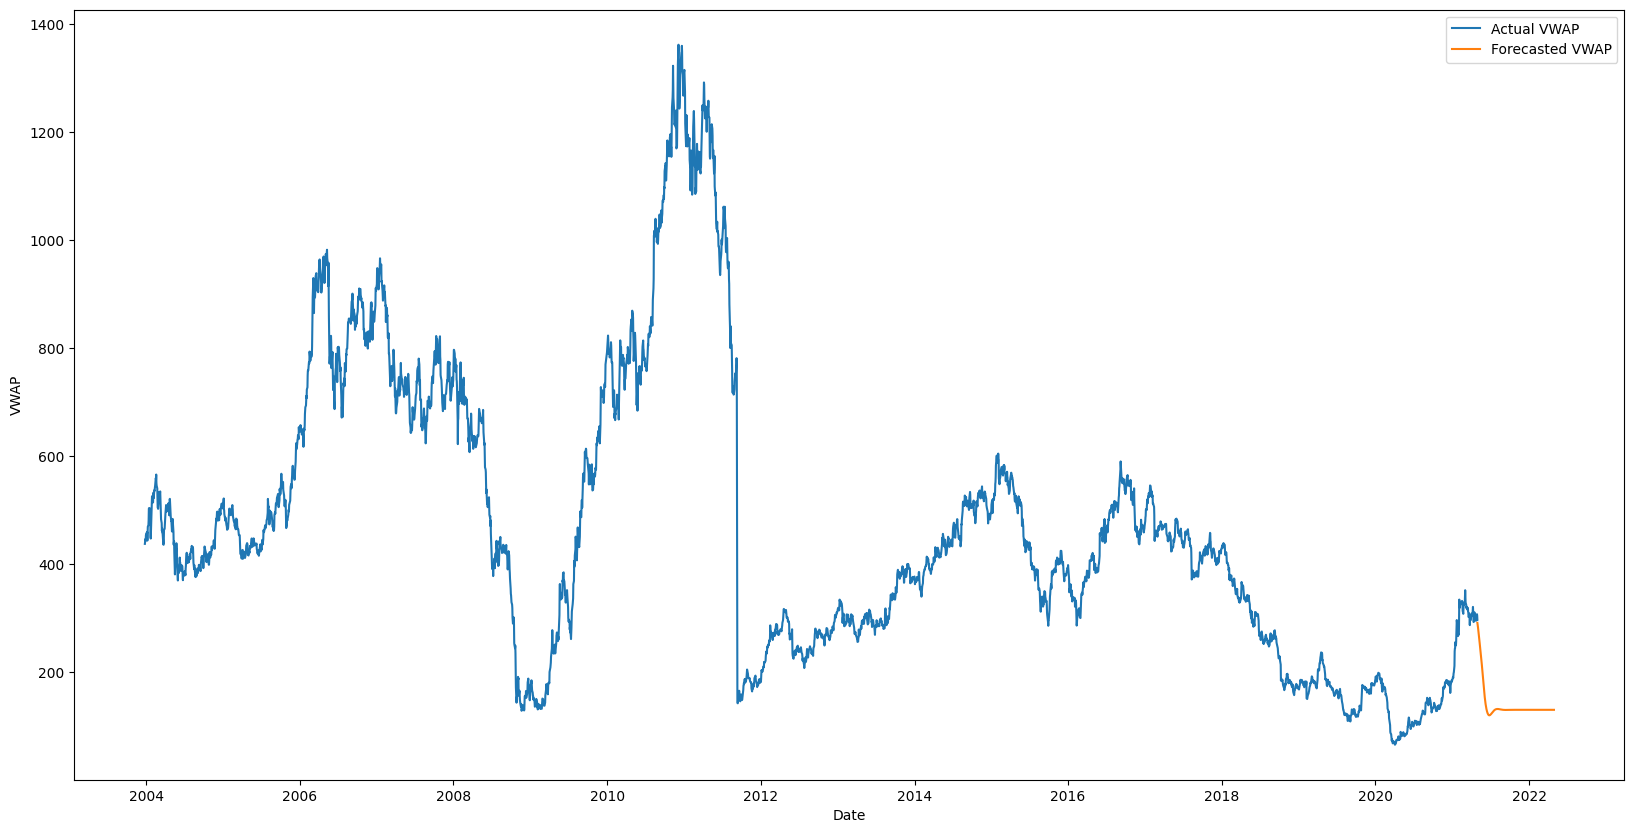

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

# Load and preprocess the data
data = pd.read_csv('Automobile.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data[data['Symbol'] == 'TATAMOTORS']  # Filter data for Tata Motors only
data = data[[ 'Date','VWAP']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['VWAP'].values.reshape(-1, 1))

# Prepare the data for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True), input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')

# Forecast VWAP for the next 365 days
last_sequence = scaled_data[-seq_length:]
predicted_vwap = []
for _ in range(365):
    prediction = model.predict(last_sequence.reshape(1, seq_length, 1))
    predicted_vwap.append(prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)

# Inverse transform the predicted VWAP values
predicted_vwap = scaler.inverse_transform(np.array(predicted_vwap).reshape(-1, 1))

# Visualize the forecasted VWAP
import matplotlib.pyplot as plt
future_dates = pd.date_range(start=data['Date'].iloc[-1], periods=365, freq='D')
forecast_data = pd.DataFrame({'Date': future_dates, 'Forecasted VWAP': predicted_vwap.flatten()})
forecast_data.set_index('Date', inplace=True)

plt.figure(figsize=(20, 10))
plt.plot(data['Date'], data['VWAP'], label='Actual VWAP')
plt.plot(forecast_data.index, forecast_data['Forecasted VWAP'], label='Forecasted VWAP')
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.legend()
plt.show()